## Worldcover

This notebook contains a very basic demonstration of using the ESA Worldcover layer in openEO.
It shows how to convert Worldcover data into a mask that can be used to focus on pixels of a specific landcover type.

In [1]:
from eo_utils import *
from matplotlib import pyplot as plt
from shapely.geometry import box

In [7]:
center = [51.3, 3.2]
zoom = 10

eoMap = openeoMap(center,zoom)
addS2Tiles(eoMap)
eoMap.map

Map(center=[51.3, 3.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

In [8]:
bbox = eoMap.getBbox()
bbox

(2.599318, 51.229076, 3.43409, 51.45897)

In [9]:
import openeo
c = openeo.connect("openeo.cloud")

In [10]:
c.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeocloud.vito.be/openeo/1.0.0/' with BearerAuth>

In [11]:
mask = c.load_collection("ESA_WORLDCOVER_10M_2020_V1",temporal_extent=["2000-06-07","2021-06-07"],bands=["MAP"]).filter_bbox({'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]})
builtup_mask = mask.band("MAP") != 50

In [12]:
sentinel2_rgb = c.load_collection("TERRASCOPE_S2_TOC_V2",temporal_extent=["2021-06-07","2021-06-07"],bands=['B04','B03','B02','B08','B11','B12']).filter_bbox({'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]})

In [13]:
masked_s2 = sentinel2_rgb.mask(builtup_mask.resample_cube_spatial(sentinel2_rgb).max_time())

In [14]:
%%time
masked_s2.download("S2_RGB_MASKED.tiff")

CPU times: user 174 ms, sys: 49.9 ms, total: 224 ms
Wall time: 33.8 s


If the area is sufficiently large, retrieving the masked data may be faster because it can exclude chunks without built-up area from being loaded.
In this particular test, with a large area over sea, the number of chunks to read decreased from ~754 to 111.

In [ ]:
%%time
sentinel2_rgb.download("S2_RGB_unmasked.tiff")

The resulting image only contains pixels marked as 'built-up' in worldcover:

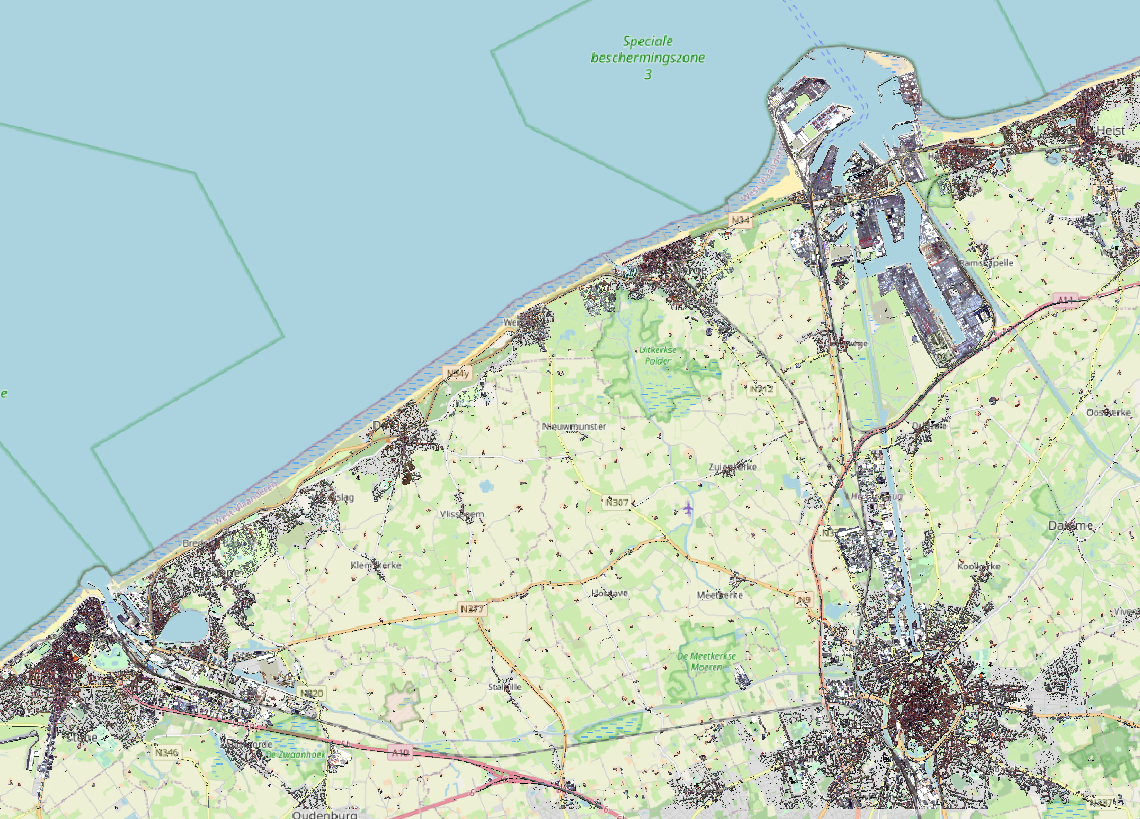